<H1> Random Inhibition</H1>
Effects of random inhibitory connections on pattern completion

In [1]:
%pylab inline
import numpy as np
from scipy.misc import comb
from itertools import combinations

Populating the interactive namespace from numpy and matplotlib


In [2]:
from inet.patterns import randpattern, separation
from inet.plots import separation_plot

<H2>Generate random input patterns</H2>
Random input patterns between 10% and 90% average activity that have initial similarities between 0.1 and 0.9

In [3]:
# generate all possible probability combinations between 10% and 90% without repetition
# n! / r! / (n-r)! , if we generate n = 9, r = 2 ==> 36 combinations
#prob = [i for i in combinations(np.arange(0.1, 1.0, 0.05),2)]
prob = [i for i in combinations(np.arange(0.1, 1.0, 0.1),2)]
len(prob)

36

In [4]:
# Number of GC cells = 50000
inputpatterns = list()
for i,j in prob:
    #inputpatterns  += [(randpattern(5000, i), randpattern(5000,j)) for _ in range(100)]
    inputpatterns  += [(randpattern(1000, i), randpattern(1000,j)) for _ in range(100)]

len(inputpatterns) # mustbe 3600

3600

Max similarity = 0.86, Min similarity = 0.078


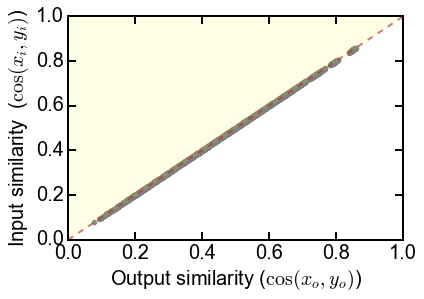

In [5]:
# Plot initial similarities
separation(inputpatterns, inputpatterns)
sim_max = np.max(separation.insimilarity)
sim_min = np.min(separation.insimilarity)
print('Max similarity = {:2.2}, Min similarity = {:2.2}'.format(sim_max, sim_min))
separation_plot(separation.insimilarity, separation.outsimilarity)

<H2> Dummy example</H2>

In [6]:
I_rnd = randpattern(1000, 0.75) # 25% of neurons active, all-to-all connectivity
outputpatterns  = [(I_rnd*x, I_rnd*y) for x,y in inputpatterns]

In [7]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 0.88127059765721127, 'proportion': 0.4891666666666667}

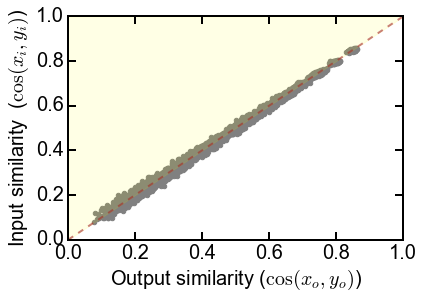

In [8]:
separation_plot(separation.insimilarity, separation.outsimilarity)

In [9]:
I_rnd = randpattern(1000, 0.25) # 75% of neurons active, all-to-all connectivity
outputpatterns  = [(I_rnd*x, I_rnd*y) for x,y in inputpatterns]

In [10]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 2.637409231560774, 'proportion': 0.5125}

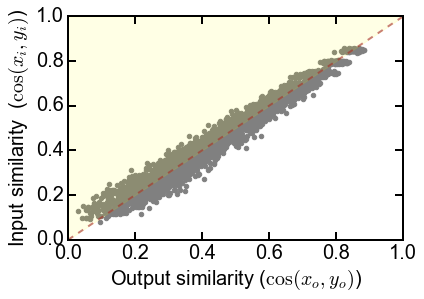

In [11]:
separation_plot(separation.insimilarity, separation.outsimilarity)

The higher the proportion of interneurons active, the (slightly) better the pattern separation

In [12]:
PIE = 0.248571428571 # probability of connections
I_network1 = randpattern(1000,1-PIE) # 25% of neurons are active (are zeros)
I = I_network1
outputpatterns  = [(I*x, I*y) for x,y in inputpatterns]

In [13]:
separation(inputpatterns, outputpatterns)
#separation_plot(separation.insimilarity, separation.outsimilarity);

{'percentage_max': 0.84429036279206837, 'proportion': 0.4825}

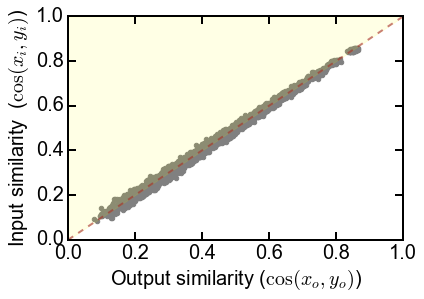

In [15]:
separation_plot(separation.insimilarity, separation.outsimilarity)

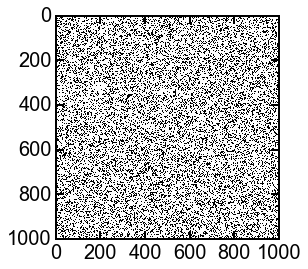

In [16]:
# load connectivity matrix of inhibitory neurons
W = np.loadtxt('w_1000_0.280_0.000_0.000_0.000_0.000_0.dat', dtype=int).T #pre, post
plt.imshow(W, cmap='binary',  interpolation='None');

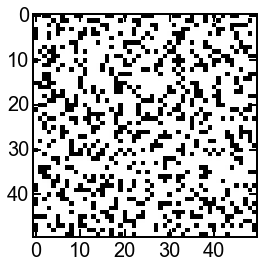

In [17]:
# plot 50 neurons
x = W[0:50,0:50]
plt.imshow(x, cmap='binary',  interpolation='None');

P(GC-PC) chemical synapse =  0.0857142857143

We take every input pattern and 8% of these neurons will be connected to the inhibitory recurrent network, and will be inhibited.

In [18]:
PEI = 0.0857142857143
I_active = np.random.choice(a = 1000, size= int(1000*PEI), replace = False)
print(I_active)
print(len(I_active))

[803 474 104 897 986 309 587 893  69 385  85  90 888 320 605 894 664 578
 504 604 440 467 538 338 110 489 747 123  54  71 582 798 323 729 302 670
 828 922 811 564 731 403 497 364 867 166 250 408 773 115 802 569 931 550
 566 247 242 502 333 232 360 349  63  82  22 421 160  94 942 108 580 562
  68 384 549 901  88 659 324 297 161 168 119 456 204]
85


In [19]:
outpatterns = list()
for x, y in inputpatterns:
    xout = x.copy()
    yout = y.copy()
    for i in I_active:
        xout[i] = 0
        yout[i] = 0
    outpatterns += [(xout, yout)]

In [20]:
len(outpatterns)

3600

In [21]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 0.84429036279206837, 'proportion': 0.4825}

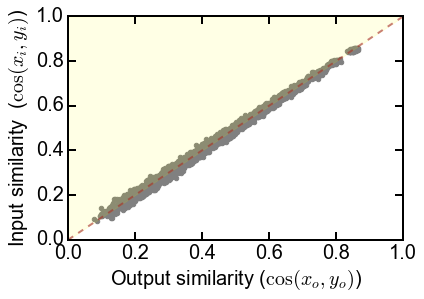

In [22]:
separation_plot(separation.insimilarity, separation.outsimilarity);

In [23]:
def active(ids, matrix):
    """
    Multiplies 
    """
    Out = np.zeros(matrix.shape[0], dtype = int)
    for i in ids:
        Out[i] = np.sum(matrix[:,i])
        
    return(Out)

In [24]:
active(I_active, W)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 265,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 278,   0,   0,   0,   0,   0,   0,   0,   0, 285,   0,
         0,   0,   0, 281, 286,   0, 304,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 290,   0,   0, 250,   0,   0, 255,   0, 276,
         0,   0,   0, 274,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       292,   0,   0,   0, 281,   0, 279,   0,   0,   0,   0, 280,   0,
         0,   0, 281,   0,   0,   0, 262,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 312, 256,   0,   0,   0,   0, 287,   0, 266,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [25]:
I = 1-active(I_active, W)

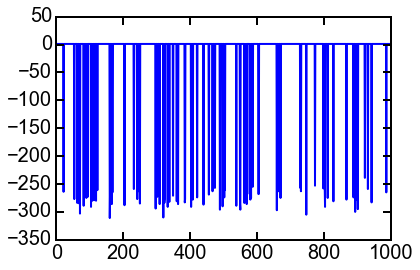

In [26]:
plt.plot(I)

In [27]:
outputpatterns  = [(I*x, I*y) for x,y in inputpatterns]

In [28]:
separation(inputpatterns, outputpatterns)

{'percentage_max': 5.07292076478012, 'proportion': 0.49583333333333335}

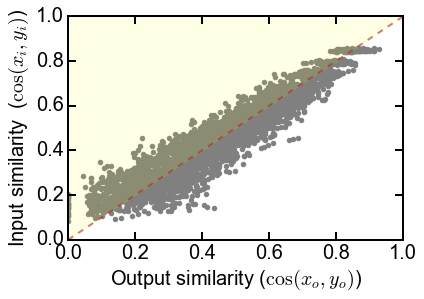

In [29]:
separation_plot(separation.insimilarity, separation.outsimilarity);

In [ ]:
# adding ones
I_add = randpattern(1000, .25) #5% active

out2  = [(I_add+x, I_add+y) for x,y in outputpatterns]
out2[0]

In [ ]:
separation(inputpatterns, out2)

In [ ]:
separation_plot(separation.insimilarity, separation.outsimilarity);

In [ ]:
# same average connectivity, but with second and thrid moments
I2 = np.ones(1000)
I2[:250]=0


In [ ]:
outputpatterns  = [(I2*x, I2*y) for x,y in inputpatterns]

In [ ]:
separation(inputpatterns, outputpatterns)

In [ ]:
separation_plot(separation.insimilarity, separation.outsimilarity);